## Import Data into Python Using Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

calldata = pd.read_csv('party_in_nyc.csv')
#calldata.head()

## Create Columns for Month, Day, and Time 
### Time is a tuple of (Hour, Minute, Second)

In [2]:
# Create time column

def getTime(created):
    time = (created.split()[-1])
    time = time.split(sep=':')
    time = tuple(time)
    return time

def getMonth(created):
    month = (created.split()[0])
    month = month.split(sep = '-')
    month = int(month[1])
    return month

def getDay(created):
    day = (created.split()[0])
    day = day.split(sep = '-')
    day = int(day[-1])
    return day

created_series = calldata.iloc[:,0]
month_series = created_series.apply(getMonth)
day_series = created_series.apply(getDay)
time_series = created_series.apply(getTime)

calldata = calldata.assign(Month=month_series.values)
calldata = calldata.assign(Day=day_series.values)
calldata = calldata.assign(Time=time_series.values)

#calldata.head()


In [3]:
from datetime import date

In [4]:
# add weekday column
def getYear(created):
    year = (created.split()[0])
    year = year.split(sep = '-')
    year = int(year[0])
    return year

def getWeekday(created):
    day = getDay(created)
    month = getMonth(created)
    year = getYear(created)
    newDate = date(int(year), int(month), int(day))
    newDate = newDate.weekday()
    if newDate == 0:
        newDate = 'Monday'
    elif newDate == 1:
        newDate = 'Tuesday'
    elif newDate == 2:
        newDate = 'Wednesday'
    elif newDate == 3:
        newDate = 'Thursday'
    elif newDate == 4:
        newDate = 'Friday'
    elif newDate == 5:
        newDate = 'Saturday'
    elif newDate == 6:
        newDate = 'Sunday'
    else:
        newDate = 'Wrong'
    return newDate

# returns weekday as int, starting with 0 as monday
def getWeekdayInt(created):
    day = getDay(created)
    month = getMonth(created)
    year = getYear(created)
    newDate = date(int(year), int(month), int(day))
    newDate = newDate.weekday()
    return newDate


In [5]:
created_series = calldata.iloc[:,0]
weekday_series = created_series.apply(getWeekday)
weekday_int_series = created_series.apply(getWeekdayInt)

calldata = calldata.assign(Weekday = weekday_series.values)
calldata = calldata.assign(WeekdayInt = weekday_int_series.values)
calldata.head()

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude,Month,Day,Time,Weekday,WeekdayInt
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930,12,31,"(00, 01, 15)",Thursday,3
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237,12,31,"(00, 02, 48)",Thursday,3
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371,12,31,"(00, 03, 25)",Thursday,3
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668,12,31,"(00, 03, 26)",Thursday,3
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516,12,31,"(00, 05, 10)",Thursday,3


In [6]:
calldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225414 entries, 0 to 225413
Data columns (total 13 columns):
Created Date     225414 non-null object
Closed Date      224619 non-null object
Location Type    225414 non-null object
Incident Zip     224424 non-null float64
City             224424 non-null object
Borough          225414 non-null object
Latitude         223946 non-null float64
Longitude        223946 non-null float64
Month            225414 non-null int64
Day              225414 non-null int64
Time             225414 non-null object
Weekday          225414 non-null object
WeekdayInt       225414 non-null int64
dtypes: float64(3), int64(3), object(7)
memory usage: 22.4+ MB


## Plot all calls by Longitude/Latitude

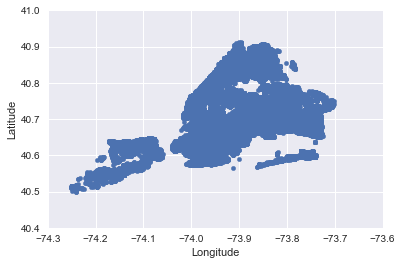

In [7]:
calldata.plot(kind = 'scatter',x='Longitude',y='Latitude',xlim = (-74.3,-73.6),ylim = (40.4,41))

## Plot only store/commercial calls by Longitude/Latitude

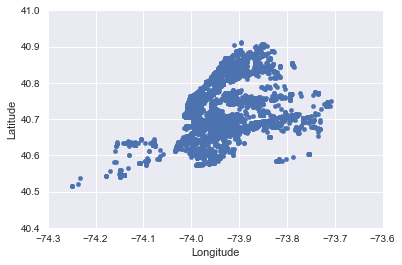

In [8]:
howdata = calldata.loc[calldata['Location Type'] == 'Store/Commercial']
howdata.plot(kind = 'scatter',x='Longitude',y='Latitude',xlim = (-74.3,-73.6),ylim = (40.4,41))

## Hexbin and Density plots of all calls by Longitude/Latitude

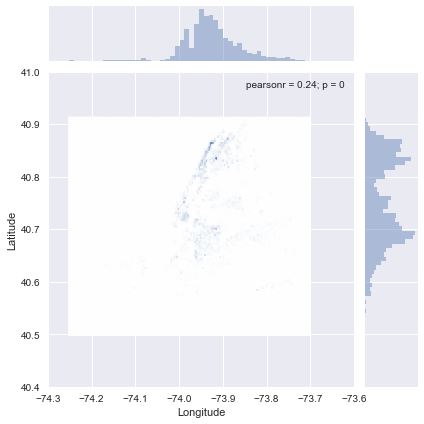

In [39]:
sns.jointplot(x="Longitude", y="Latitude", data=calldata, kind="hex",xlim = (-74.3,-73.6),ylim = (40.4,41))

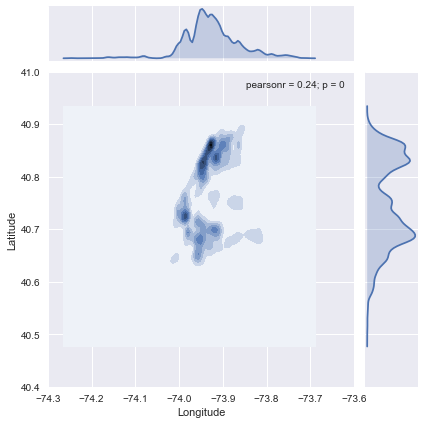

In [53]:
sns.jointplot(x="Longitude", y="Latitude", data=calldata, kind="kde",xlim = (-74.3,-73.6),ylim = (40.4,41))

In [9]:
#Bailey Stuff

#Graph the density of calls to location type to hours in the day


#created_series = calldata.iloc[:,0]
#month_series = created_series.apply(getMonth)
#day_series = created_series.apply(getDay)
#time_series = created_series.apply(getTime)

#calldata = calldata.assign(Month=month_series.values)
#calldata = calldata.assign(Day=day_series.values)
#calldata = calldata.assign(Time=time_series.values)
#def getDay(created):
 #   day = (created.split()[0])
 #   day = day.split(sep = '-')
 #   day = day[-1]
 #   return day

def getHour(time):
    hour = int(time[0])
    return hour

hour_series = time_series.apply(getHour)

calldata = calldata.assign(Hour=hour_series)
calldata.head()

#make histogram for all location types vs hours, each location type vs hours. City vs. hour, borough vs hour
store = calldata.loc[calldata['Location Type'] == 'Store/Commercial']
house = calldata.loc[calldata['Location Type'] == 'Residential Building/House']
club = calldata.loc[calldata['Location Type'] == 'Club/Bar/Restaurant']
street = calldata.loc[calldata['Location Type'] == 'Street/Sidewalk']
park = calldata.loc[calldata['Location Type'] == 'Park/Playground']
church = calldata.loc[calldata['Location Type'] == 'House of Worship']

man = calldata.loc[calldata['Borough'] == 'MANHATTAN']
bro = calldata.loc[calldata['Borough'] == 'BROOKLYN']
brx = calldata.loc[calldata['Borough'] == 'BRONX']
que = calldata.loc[calldata['Borough'] == 'QUEENS']
sta = calldata.loc[calldata['Borough'] == 'STATEN ISLAND']
uns = calldata.loc[calldata['Borough'] == 'Unspecified']
calldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225414 entries, 0 to 225413
Data columns (total 14 columns):
Created Date     225414 non-null object
Closed Date      224619 non-null object
Location Type    225414 non-null object
Incident Zip     224424 non-null float64
City             224424 non-null object
Borough          225414 non-null object
Latitude         223946 non-null float64
Longitude        223946 non-null float64
Month            225414 non-null int64
Day              225414 non-null int64
Time             225414 non-null object
Weekday          225414 non-null object
WeekdayInt       225414 non-null int64
Hour             225414 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 24.1+ MB


(array([ 60969.,  10743.,   3549.,   4616.,   5163.,   7003.,  14142.,
         14337.,  24760.,  80132.]),
 array([  0. ,   2.3,   4.6,   6.9,   9.2,  11.5,  13.8,  16.1,  18.4,
         20.7,  23. ]),
 <a list of 10 Patch objects>)

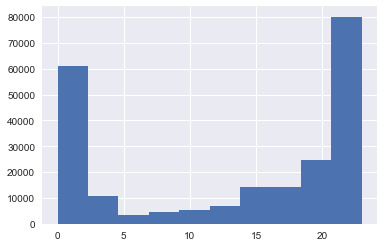

In [10]:
plt.hist(calldata['Hour'])

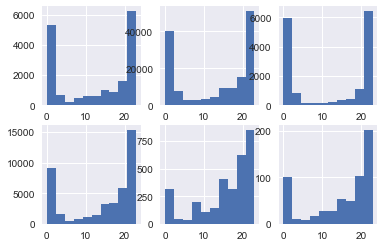

In [11]:
#Locations by hour

fig = plt.figure()

ax1 = fig.add_subplot(2, 3, 1)
ax1.hist(store['Hour'])
#ax1.title('Store/Commercial')
ax2 = fig.add_subplot(2, 3, 2)
ax2.hist(house['Hour'])
#ax2.title('Residential Building/House')
ax3 = fig.add_subplot(2, 3, 3)
ax3.hist(club['Hour'])
#ax3.title('Club/Bar/Restaurant')
ax4 = fig.add_subplot(2, 3, 4)
ax4.hist(street['Hour'])
#ax4.title('Street/Sidewalk')
ax5 = fig.add_subplot(2, 3, 5)
ax5.hist(park['Hour'])
#ax5.title('Park/Playground')
ax6 = fig.add_subplot(2, 3, 6)
ax6.hist(church['Hour'])
#ax6.title('House of Worship')

plt.show()

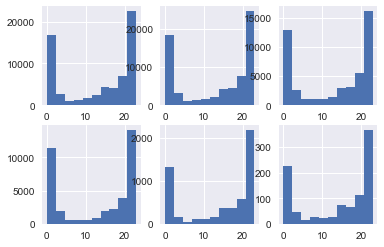

In [12]:
#Borough by hour

fig = plt.figure()

ax1 = fig.add_subplot(2, 3, 1)
ax1.hist(man['Hour'])
#ax1.title('Store/Commercial')
ax2 = fig.add_subplot(2, 3, 2)
ax2.hist(bro['Hour'])
#ax2.title('Residential Building/House')
ax3 = fig.add_subplot(2, 3, 3)
ax3.hist(brx['Hour'])
#ax3.title('Club/Bar/Restaurant')
ax4 = fig.add_subplot(2, 3, 4)
ax4.hist(que['Hour'])
#ax4.title('Street/Sidewalk')
ax5 = fig.add_subplot(2, 3, 5)
ax5.hist(sta['Hour'])
#ax5.title('Park/Playground')
ax6 = fig.add_subplot(2, 3, 6)
ax6.hist(uns['Hour'])
#ax6.title('House of Worship')

plt.show()

In [13]:
# plot locations over a week
mon = calldata.loc[calldata['WeekdayInt'] == 0]
tues = calldata.loc[calldata['WeekdayInt'] == 1]
wed = calldata.loc[calldata['WeekdayInt'] == 2]
thurs = calldata.loc[calldata['WeekdayInt'] == 3]
fri = calldata.loc[calldata['WeekdayInt'] == 4]
sat = calldata.loc[calldata['WeekdayInt'] == 5]
sun = calldata.loc[calldata['WeekdayInt'] == 6]


In [14]:
objects = ('mon', 'tues', 'wed', 'thurs', 'fri', 'sat', 'sun')
y_pos = np.arange(len(objects))
num_calls = [len(mon), len(tues), len(wed), len(thurs), len(fri), len(sat), len(sun)]

[20579, 16244, 17049, 19257, 30130, 61161, 60994]

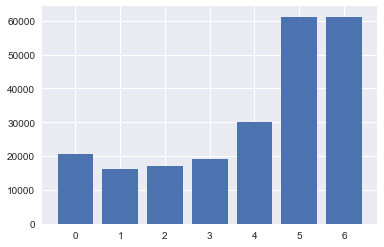

In [15]:
# currently a bar plot, could have been a histogram but why not
plt.bar(y_pos, num_calls)
num_calls

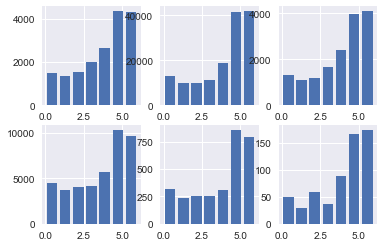

In [16]:
#Locations by weekday

fig = plt.figure()

ax1 = fig.add_subplot(2, 3, 1)
ax1.hist(store['WeekdayInt'], bins = 7, rwidth = 0.8)
#ax1.title('Store/Commercial')
ax2 = fig.add_subplot(2, 3, 2)
ax2.hist(house['WeekdayInt'], bins = 7, rwidth = 0.8)
#ax2.title('Residential Building/House')
ax3 = fig.add_subplot(2, 3, 3)
ax3.hist(club['WeekdayInt'], bins = 7, rwidth = 0.8)
#ax3.title('Club/Bar/Restaurant')
ax4 = fig.add_subplot(2, 3, 4)
ax4.hist(street['WeekdayInt'], bins = 7, rwidth = 0.8)
#ax4.title('Street/Sidewalk')
ax5 = fig.add_subplot(2, 3, 5)
ax5.hist(park['WeekdayInt'], bins = 7, rwidth = 0.8)
#ax5.title('Park/Playground')
ax6 = fig.add_subplot(2, 3, 6)
ax6.hist(church['WeekdayInt'], bins = 7, rwidth = 0.8)
#ax6.title('House of Worship')

plt.show()

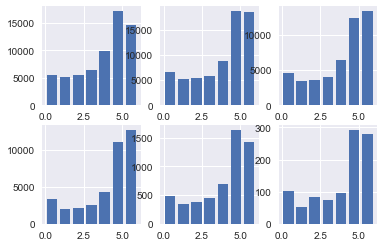

In [18]:
# boroughs by weekday
fig = plt.figure()

ax1 = fig.add_subplot(2, 3, 1)
ax1.hist(man['WeekdayInt'], bins = 7, rwidth = 0.8)
ax2 = fig.add_subplot(2, 3, 2)
ax2.hist(bro['WeekdayInt'], bins = 7, rwidth = 0.8)
ax3 = fig.add_subplot(2, 3, 3)
ax3.hist(brx['WeekdayInt'], bins = 7, rwidth = 0.8)
ax4 = fig.add_subplot(2, 3, 4)
ax4.hist(que['WeekdayInt'], bins = 7, rwidth = 0.8)
ax5 = fig.add_subplot(2, 3, 5)
ax5.hist(sta['WeekdayInt'], bins = 7, rwidth = 0.8)
ax6 = fig.add_subplot(2, 3, 6)
ax6.hist(uns['WeekdayInt'], bins = 7, rwidth = 0.8)

plt.show()

In [17]:
import plotly
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": Layout(title="hello world")
})

ModuleNotFoundError: No module named 'plotly'

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df.head()

df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df['long'],
        lat = df['lat'],
        text = df['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = df['cnt'],
            cmax = df['cnt'].max(),
            colorbar=dict(
                title="Incoming flightsFebruary 2011"
            )
        ))]

layout = dict(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        colorbar = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
plotly.offline.iplot( fig, validate=False, filename='d3-airports' )

NameError: name 'plotly' is not defined

In [46]:
# try to identify specific locations by latitude/longitude
# see if the first location is repeated anywhere over the year
lat = calldata.iloc[1].Latitude
long = calldata.iloc[1].Longitude
lat0 = calldata.loc[calldata['Latitude'] == lat]
long0 = calldata.loc[calldata['Longitude'] == long]
#print(lat0.head())
#print(long0.head())
#print(lat)
#print(long)

# est. lat/long for 1: 40.8593241939, -73.9312373366

# true lat/long for 1: 40.85932419390543, -73.93123733660876
# true lat/long for 97: 40.85932419390543, -73.93123733660876
# this seems to be a fail, using google maps as lookup implies that there's just not the accuracy needed

In [48]:
# specific heatmaps
bars = calldata.loc[calldata['Location Type'] == 'Club/Bar/Restaurant']
bars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15766 entries, 13 to 225402
Data columns (total 14 columns):
Created Date     15766 non-null object
Closed Date      15740 non-null object
Location Type    15766 non-null object
Incident Zip     15747 non-null float64
City             15747 non-null object
Borough          15766 non-null object
Latitude         15731 non-null float64
Longitude        15731 non-null float64
Month            15766 non-null int64
Day              15766 non-null int64
Time             15766 non-null object
Weekday          15766 non-null object
WeekdayInt       15766 non-null int64
Hour             15766 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.8+ MB


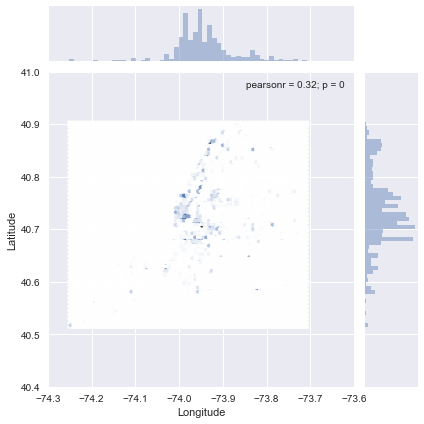

In [50]:
# hexbin and density plots of all cars about bars/restaurants by long/lat
sns.jointplot(x="Longitude", y="Latitude", data=bars, kind="hex",xlim = (-74.3,-73.6),ylim = (40.4,41))

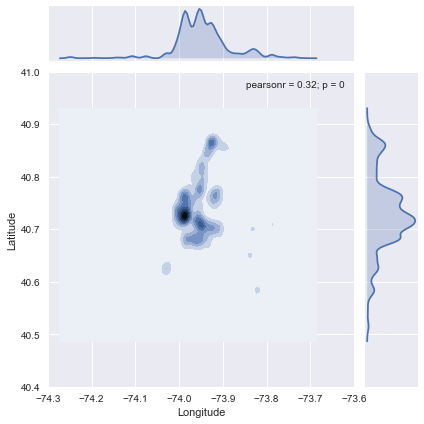

In [51]:
sns.jointplot(x="Longitude", y="Latitude", data=bars, kind="kde",xlim = (-74.3,-73.6),ylim = (40.4,41))